In [19]:
from typing import (
    List,
    Tuple,
    Dict,
)

import os
import sys
import csv

import altair as alt
import pandas as pd

In [17]:
EXPERIMENT_FOLDER = 'experiment_data/keyword_matching'
EXPERIMENT_FILES = [f for f in os.listdir(EXPERIMENT_FOLDER)]
METRICS = {
    'active valid/ADR/f1': 'F1',
    'active valid/ADR/precision': 'Precession',
    'active valid/ADR/recall': 'Recall',
}

DataDef = List[
    Dict[str, object]
]

In [33]:
def parse_file(file_name: str, experiment_tag: str) -> DataDef:
    output = []
    with open(file_name, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            # tag, value, step
            metric_name, metric_val, step = row
            if metric_name not in METRICS:
                continue
            output.append({
                'metric_name': METRICS[metric_name],
                'metric_val': float(metric_val),
                'step': float(step),
                'tag': experiment_tag,
            })
    return output

data = []
for file in EXPERIMENT_FILES:
    if file.startswith('.'):
        print(f'skipping: {file}...')
        continue
    file_res = parse_file(os.path.join(EXPERIMENT_FOLDER, file), file[:-len('.csv')])
    print(f'Parsed: {file}')
    data.extend(file_res)
data_frame = pd.DataFrame(data)
data_frame.head(2)

Parsed: no_weak.csv
Parsed: weak_0.1.csv
Parsed: weak_0.01.csv
Parsed: weak_0.001.csv
skipping: .ipynb_checkpoints...
Parsed: weak_1.csv


,metric_name,metric_val,step,tag
0,Precession,0.484470,1.0,no_weak
1,Precession,0.693564,6.0,no_weak


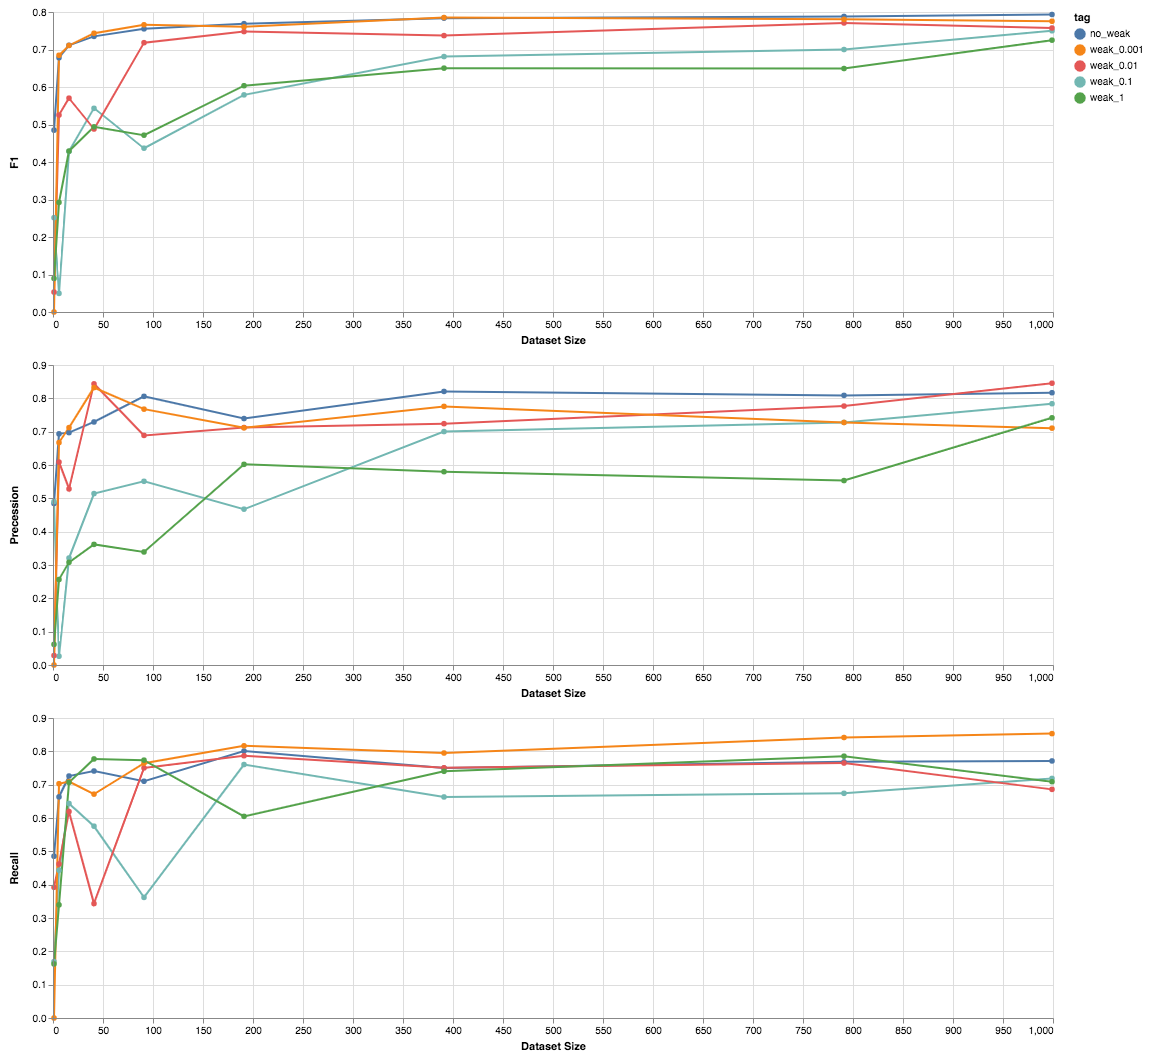

In [43]:
METRIC='F1'

def metric_graph(data_frame: pd.DataFrame, metric: str) -> alt.Chart:
    return alt.Chart(data_frame).mark_line(point=True).encode(
        x=alt.X('step', title='Dataset Size'),
        y=alt.Y('metric_val', title=metric),
        color='tag',
    ).transform_filter(alt.datum.metric_name == metric).properties(width=1000)

res = [metric_graph(data_frame, metric) for metric in METRICS.values()]
res[0] & res[1] & res[2]